In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [97]:
indir = r"/mnt/g/Shared drives/BTO Topic 2  Integrating EE & DR/Task 2/Load_Shape_Data/System/EIA system data"
gross = pd.read_csv(os.path.join(indir,'Demand_for_California_Independent_System_Operator_(CISO)_hourly_-_local_time.csv'), 
                    skiprows=5, header=None, index_col=0, parse_dates=True)
gross.columns = ['mwh']

In [101]:
gross

mwh
0                                 
2020-02-28 11:00:00-08:00  22838.0
2020-02-28 10:00:00-08:00  22998.0
2020-02-28 09:00:00-08:00  23719.0
2020-02-28 08:00:00-08:00  24287.0
2020-02-28 07:00:00-08:00  23489.0
...                            ...
2015-07-01 05:00:00-07:00  25661.0
2015-07-01 04:00:00-07:00  26388.0
2015-07-01 03:00:00-07:00  27416.0
2015-07-01 02:00:00-07:00  28989.0
2015-07-01 01:00:00-07:00  31486.0

[40883 rows x 1 columns]

In [102]:
solar = pd.read_csv(os.path.join(indir, "Net_generation_from_solar_for_California_Independent_System_Operator_(CISO)_hourly_-_local_time.csv"),
                   skiprows=5, header=None, index_col=0, parse_dates=True)
solar.columns=['mwh']
wind = pd.read_csv(os.path.join(indir, "Net_generation_from_wind_for_California_Independent_System_Operator_(CISO)_hourly_-_local_time.csv"),
                   skiprows=5, header=None, index_col=0, parse_dates=True)
wind.columns=['mwh']

In [103]:
gross.head()

mwh
0                                 
2020-02-28 11:00:00-08:00  22838.0
2020-02-28 10:00:00-08:00  22998.0
2020-02-28 09:00:00-08:00  23719.0
2020-02-28 08:00:00-08:00  24287.0
2020-02-28 07:00:00-08:00  23489.0

In [104]:
solar.head()

mwh
0                             
2020-02-28 00:00:00-08:00  -33
2020-02-27 23:00:00-08:00  -33
2020-02-27 22:00:00-08:00  -34
2020-02-27 21:00:00-08:00  -33
2020-02-27 20:00:00-08:00  -32

In [105]:
wind.head()

mwh
0                             
2020-02-28 00:00:00-08:00  155
2020-02-27 23:00:00-08:00  172
2020-02-27 22:00:00-08:00  183
2020-02-27 21:00:00-08:00  169
2020-02-27 20:00:00-08:00  129

In [107]:
renew = solar.add(wind).dropna()
renew.tail()

mwh
0                               
2020-02-27 20:00:00-08:00   97.0
2020-02-27 21:00:00-08:00  136.0
2020-02-27 22:00:00-08:00  149.0
2020-02-27 23:00:00-08:00  139.0
2020-02-28 00:00:00-08:00  122.0

In [109]:
net = gross.sub(renew).dropna()
net.tail()

mwh
0                                 
2020-02-27 20:00:00-08:00  27323.0
2020-02-27 21:00:00-08:00  26311.0
2020-02-27 22:00:00-08:00  25012.0
2020-02-27 23:00:00-08:00  23372.0
2020-02-28 00:00:00-08:00  21853.0

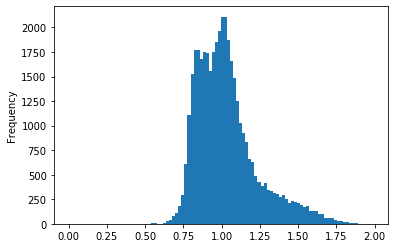

In [111]:
gross['median ratio'] = gross['mwh']/gross['mwh'].median()
gross['median ratio'].plot.hist(bins=100)

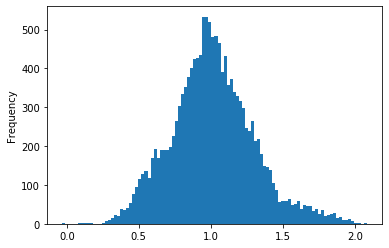

In [112]:
net['median ratio'] = net['mwh']/net['mwh'].median()
net['median ratio'].plot.hist(bins=100)

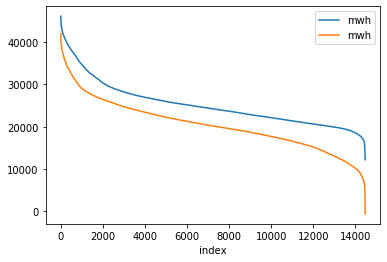

In [162]:
ax = gross.loc[net.index.values,'mwh'].sort_values(ascending=False).dropna().reset_index(drop=True).reset_index().plot(x='index', y='mwh')
net['mwh'].sort_values(ascending=False).dropna().reset_index(drop=True).reset_index().plot(x='index', y='mwh', ax=ax)

In [118]:
gross.quantile(0.97)

mwh             38639.760000
medianratio         1.541152
median ratio        1.541152
Name: 0.97, dtype: float64

In [120]:
net.quantile(0.97)

mwh             33123.000000
median ratio        1.641703
Name: 0.97, dtype: float64

Text(0.5, 0, '% Hours exceeding')

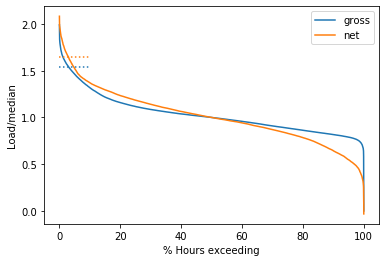

In [166]:
gross_ldc = gross.loc[gross.index.values,'median ratio'].sort_values(ascending=False).dropna().reset_index(drop=True).reset_index()
gross_ldc['percentile'] = gross_ldc['index']/gross_ldc['index'].max()*100
net_ldc = net.loc[net.index.values,'median ratio'].sort_values(ascending=False).dropna().reset_index(drop=True).reset_index()
net_ldc['percentile'] = net_ldc['index']/net_ldc['index'].max()*100
ax = gross_ldc.plot(x='percentile', y='median ratio', label='gross')
net_ldc.plot(x='percentile', y='median ratio', ax=ax, label='net')
ax.plot([0,10], [net.quantile(0.97)['median ratio']]*2, color='C1', linestyle=':')
ax.plot([0,10], [gross.quantile(0.97)['median ratio']]*2, color='C0', linestyle=':')
ax.set_ylabel('Load/median')
ax.set_xlabel('% Hours exceeding')

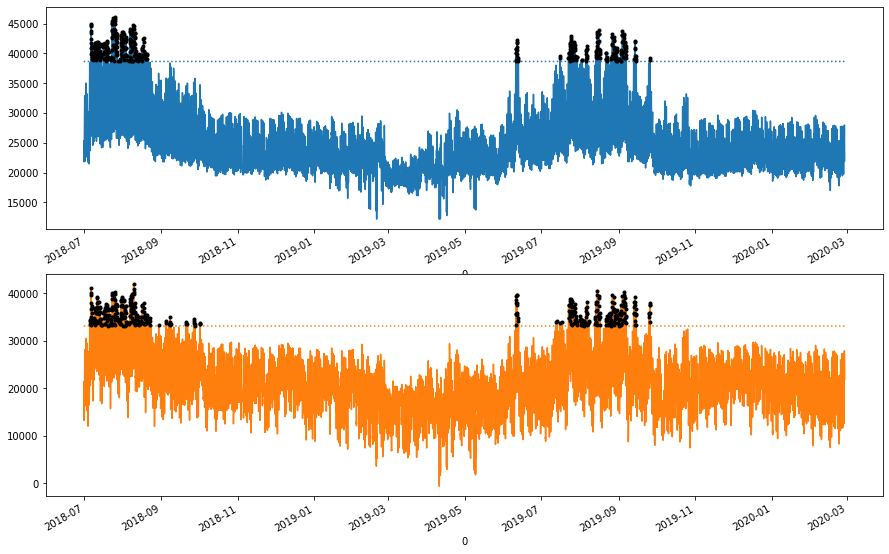

In [179]:
fig,ax=plt.subplots(2,1,figsize=[15,10])
gross.loc[net.index,'mwh'].plot(ax=ax[0], color='C0')
net['mwh'].plot(ax=ax[1], color='C1')
ax[0].plot(net.index, [gross.quantile(0.97)['mwh']]*len(net), color='C0', linestyle=':')
sel = gross.loc[net.index,'median ratio']>=gross.quantile(0.97)['median ratio']
gross.loc[net.index, 'mwh'].loc[sel].plot(ax=ax[0], color='k', linestyle='', marker='.')
ax[1].plot(net.index, [net.quantile(0.97)['mwh']]*len(net), color='C1', linestyle=':')
sel = net.loc[net.index,'median ratio']>=net.quantile(0.97)['median ratio']
net.loc[net.index, 'mwh'].loc[sel].plot(ax=ax[1], color='k', linestyle='', marker='.')